# **CS 181 HW5 Problem 2**
---

#### Initialize data:

In [31]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True)  # download MNIST
N = 6000 

x = mnist_trainset.data[:N]  # select N datapoints
x = x.flatten(1)             # flatten the images
x = x.float()                # convert pixels from uint8 to float
x = x.numpy()              # uncomment to use numpy (optional)

In [32]:

import numpy as np
import matplotlib.pyplot as plt
import random
import copy
from copy import deepcopy
from scipy.spatial.distance import cdist
import seaborn as sns

In [49]:
class KMeans(object):
    # K is the K in KMeans
    def __init__(self, K):
        self.K = K
        self.centers = np.random.randn(10,784)
        self.clusters = [[] for _ in range(self.K)]
        self.errors = []

    # X is a (N x 784) array since the dimension of each image is 28x28.
    def fit(self, X):
        errors = []

        for _ in range(10):
            current_error = 0
            self.clusters = [[] for _ in range(self.K)]
            for image in X:
                ind = 0
                min = float('inf')
                for i, center in enumerate(self.centers):
                    dist = np.linalg.norm(image-center)
                    if dist < min:
                        min = dist
                        ind = i
                self.clusters[ind].append(image)
                current_error += min ** 2

            for index in range(self.K):
                self.centers[index] = np.mean(self.clusters[index], axis = 0)
            
            errors.append(current_error)

        self.errors = errors

    # This should return the arrays for K images. Each image should represent the mean of each of the fitted clusters.
    def get_mean_images(self):
        return self.centers

    def part5k(self):
        print("k means part 5 called")
        res = np.array([len(cluster) for cluster in self.clusters])
        print(res)
        return res

    def predict(self, X, pad = None):
        diffs = np.stack([X] * self.K, axis=1) - self.centers
        preds = np.argmin(np.sum(np.square(diffs), axis=2), axis=1)  # (N,)
        return preds

    def findClusterSize(self):
        sizes = []
        for cluster in self.clusters:
            sizes.append(len(cluster))
        return np.array(sizes)

In [50]:
def make_mean_image_plot(data, standardized=False):
    # Number of random restarts
    niters = 3
    K = 10
    # Will eventually store the pixel representation of all the mean images across restarts
    allmeans = np.zeros((K, niters, 784))
    for i in range(niters):
        KMeansClassifier = KMeans(K=K)
        KMeansClassifier.fit(data)
        part1_error = KMeansClassifier.errors
        print(part1_error)

        allmeans[:,i] = KMeansClassifier.get_mean_images()

    # # ~~ Part 1 ~~ plotting errors
    plt.plot([i for i in range(len(part1_error))], part1_error)

    fig = plt.figure(figsize=(10,10))
    plt.suptitle('Class mean images across random restarts' + (' (standardized data)' if standardized else ''), fontsize=16)
    for k in range(K):
        for i in range(niters):
            ax = fig.add_subplot(K, niters, 1+niters*k+i)
            plt.setp(ax.get_xticklabels(), visible=False)
            plt.setp(ax.get_yticklabels(), visible=False)
            ax.tick_params(axis='both', which='both', length=0)
            if k == 0: plt.title('Iter '+str(i))
            if i == 0: ax.set_ylabel('Class '+str(k), rotation=90)
            plt.imshow(allmeans[k,i].reshape(28,28), cmap='Greys_r')
    plt.show()

[20586885485.277348, 17629936555.598305, 16389700921.926659, 15916174567.45489, 15642125790.93465, 15544444275.32203, 15507639650.955013, 15472275129.860348, 15447074674.091974, 15434436804.923536]
[20585949715.548843, 17630469914.70321, 16038759691.081161, 15483249509.823542, 15283999946.928461, 15231980483.482206, 15215349240.229002, 15204117074.11964, 15194100255.24582, 15185240116.487226]
[20586943785.09078, 17508248978.75513, 16036353982.329151, 15652095028.676939, 15471705354.633013, 15402522302.749947, 15354844703.912184, 15309382081.109749, 15265159069.283058, 15234267793.702345]


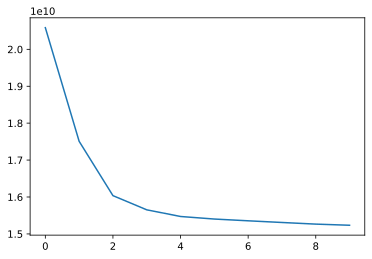

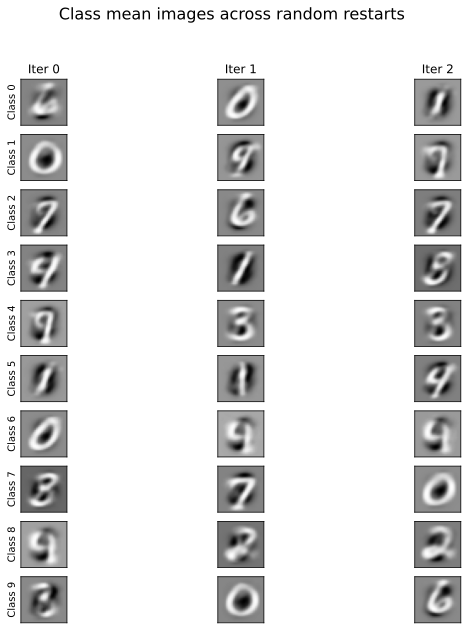

In [51]:
make_mean_image_plot(x-x.mean(0), False)

In [52]:
15234267793.702345 / len(x)

2539044.6322837244

#### **Todo:** implement PCA

*Hint: see `.linalg.svd()`*

In [11]:
def pca(x, n_comps=500):
    n = 6000
    U, Sigma, Vt = np.linalg.svd((x - x.mean(0)) / (len(x) **0.5))
    top_eigvals = Sigma ** 2
    top_pcomps = Vt
    return top_eigvals[:n_comps], top_pcomps[:n_comps]

#### **Todo:** calculate cumulative fraction of variance

*Hint: see `.cumsum()`*

In [12]:
def calc_cfvs(eigvals):
    cumsum = np.cumsum(eigvals)
    cum_frac_vars = cumsum / cumsum[-1]
    return cum_frac_vars

#### **Todo:** calculate mean squared L2 norm reconstruction loss

In [40]:
def calc_errs(x, pcomps):
    N = 2000
    centered = x - x.mean(0)
    err_mean = (np.linalg.norm(centered, axis=1) ** 2).mean()
    
    top_ten = pcomps[:10]
    err_pcomp = (np.linalg.norm(centered - centered @ ten.T @ ten, axis=1) ** 2).mean()
    return err_mean, err_pcomp

#### Plot and print errors:

In [41]:
def plot_pic(pic, ax, title=''):
    x = pic.reshape(28, 28)
    ax.imshow(x, cmap='binary')
    ax.set_title(title)
    ax.axis('off')

def make_plots(eigvals, cfvs, x_mean, pcomps):
    # plot eigenvals and cfvs
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
    ax1.plot(eigvals, color='tomato')
    ax1.set_title('Eigenvalues')
    ax2.plot(cfvs, color='tomato')
    ax2.set_title('CFVs')
    fig.savefig('p2_cfvs.pdf')

    # plot mean
    fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    plot_pic(x_mean, ax, title='Mean')
    fig.savefig('p2_mean.pdf')

    # plot top 10 pcomps
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(10):
        plot_pic(pcomps[i], axes.flat[i], title=f'PC index {i}')
    fig.savefig('p2_pcomps.pdf')

Reconstruction error (using mean): 3.436024e+06
Reconstruction error (using mean and top 10 pcomps): 1.731315e+06


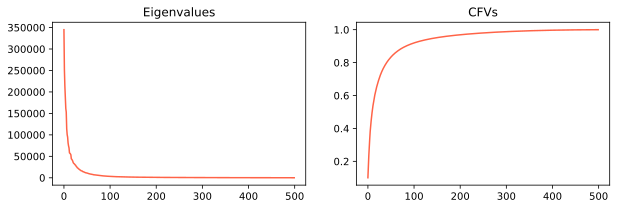

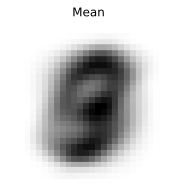

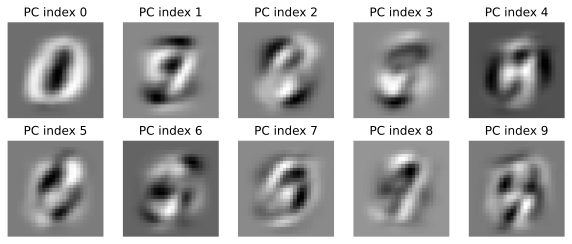

In [42]:
# do PCA
eigvals, pcomps = pca(x)

# calculate CFVs
fcvs = calc_cfvs(eigvals)

# print errors
err_mean, err_pcomp = calc_errs(x, pcomps)
print(f'Reconstruction error (using mean): {err_mean:3e}')
print(f'Reconstruction error (using mean and top 10 pcomps): {err_pcomp:3e}')

# make plots
make_plots(eigvals, fcvs, x.mean(0), pcomps)
